#What is Netflix?
Netflix, Inc. is an American subscription streaming service and production company. It offers a library of films and television series through distribution deals as well as its own productions, known as Netflix Originals. As of March 31, 2023, with an estimated 232.5 million paid memberships in more than 190 countries, it is the most-subscribed video on demand streaming service.

Founded by Reed Hastings and Marc Randolph in Scotts Valley, California, Netflix initially operated as a DVD sales and rental business. However, within a year, it shifted its focus exclusively to DVD rentals. In 2007, the company introduced streaming media and video on demand services, marking a significant step in its evolution.



#🎯 Business Problem
Analyzing the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

#📚 About Data

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

The dataset consists of a list of all the TV shows/movies available on Netflix:

* Show_id: Unique ID for every Movie / Tv Show
* Type: Identifier - A Movie or TV Show
* Title: Title of the Movie / Tv Show
* Director: Director of the Movie
* Cast: Actors involved in the movie/show
* Country: Country where the movie/show was produced
* Date_added: Date it was added on Netflix
* Release_year: Actual Release year of the movie/show
* Rating: TV Rating of the movie/show
* Duration: Total Duration - in minutes or number of seasons
* Listed_in: Genre
* Description: The summary description

#1.  Importing Libraries, Loading the data and Basic Observations

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
path = "/content/drive/MyDrive/Data sets/Netflix_dataset.csv"

df = pd.read_csv(path)

In [27]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Showcased here are the first 5 rows of datset. The actual size of data set is given below

In [28]:
df.shape

(8807, 12)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


From the above analysis, it is clear that, data has total of 12 features with lots of mixed alpha numeric data. Also we can see missing data in 5 of the total columns.

In [30]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


It is seen that show_id column has all unique values, Title column has all unique values i.e. total 8807 which equates with total rows in the dataset. Hence It can be concluded that ,

Total 8807 movies/TV shows data is provided in the dataset.

# Statistical analysis

In [31]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


* Only single column having numerical values. It gives idea of release year of the content ranges between what timeframe.
Rest all the columns are having categorical data.

In [32]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


### 🔍 Insights

**1. Type of content** - Among the 8807 items available on Netflix, 6131 of them are movies, accounting for nearly `70%` of the total content. The remaining `30%` consists of TV series.

**2. Director** - `Rajiv Chilaka` holds the top position on the director list, with `19 credits` to his name. He specializes in creating animated movies for children.

**3. Cast** - `David Attenborough` leads the actor list with 19 appearances in various films and shows on Netflix.

**4. Country** - The `USA` ranks at the top as the country with the highest production contribution to Netflix, accounting for `35%` of the total content.

**5. Date Added** - `January 1, 2020`, stands out as the peak date for content uploads on Netflix. On that day alone, approximately `109` different shows and movies were added to the platform.

**6. Ratings** - There are 17 different types of ratings present on Netflix. The `"TV-MA"` (Mature Audience Only) rating dominates the charts, covering almost `36%` of the total shows and movies on the platform with this rating.

# 2. Data Cleaning

Overall null values in each column of the dataset

In [33]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


* 3 missing values are found in duration column

In [34]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [35]:
ind = df[df['duration'].isna()].index
df.loc[ind] = df.loc[ind].fillna(method = 'ffill', axis = 1)

In [36]:
# Replace the wrong entries done in the ratng column

df.loc[ind, 'rating'] = 'Not Available'

In [37]:
df.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...


* Fill the null values in rating column

In [38]:
df[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [39]:
indices = df[df.rating.isna()].index
indices

Index([5989, 6827, 7312, 7537], dtype='int64')

In [40]:
df.loc[indices, 'rating'] = 'Not Available'

In [41]:
df.loc[indices]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [42]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Not Available', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

In rating column, NR (Not Rated) is same as the UR ( Unrated). Let's change UR to NR

In [43]:
df.loc[df['rating'] == "UR", 'rating'] = 'NR'
df.rating.value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


* Dropping Null values from date_added column

In [44]:
df.drop(df.loc[df['date_added'].isna()].index, axis = 0, inplace = True)

In [45]:
df['date_added'].value_counts()

,count
date_added,
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71
...,...
"February 2, 2017",1
"September 11, 2019",1
"May 17, 2015",1


* For 'date_added' column, all values conform to date format, So we can convert its data type from object to datetime

In [46]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')
df['date_added']

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24
...,...
8802,2019-11-20
8803,2019-07-01
8804,2019-11-01
8805,2020-01-11


1. str.strip(): We've added .str.strip() to the 'date_added' column before passing it to pd.to_datetime. This will remove any leading or trailing whitespaces from the date strings, addressing the issue of extra spaces.

2. format='%B %d, %Y': We explicitly specify the expected date format ('%B %d, %Y') within pd.to_datetime to ensure consistent parsing.

3. errors='coerce': This argument tells pd.to_datetime to handle any parsing errors by setting invalid dates to NaT (Not a Time) instead of raising an exception.


* Now adding a new column 'year_added' by extracting the year from 'date_added' column



In [47]:
df['year_added'] = df['date_added'].dt.year

* Similarly adding another column "month_added" by extracting the month from 'date_added' column

In [48]:
df['month_added'] = df['date_added'].dt.month

In [49]:
df[['date_added', 'year_added', 'month_added']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_added   8797 non-null   datetime64[ns]
 1   year_added   8797 non-null   int32         
 2   month_added  8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 206.2 KB


In [50]:
# total null values in each column

df.isna().sum()

,0
show_id,0
type,0
title,0
director,2624
cast,825
country,830
date_added,0
release_year,0
rating,0
duration,0


In [51]:
# Percentage Null values in each column

round((df.isna().sum()/df.shape[0])*100)

,0
show_id,0.0
type,0.0
title,0.0
director,30.0
cast,9.0
country,9.0
date_added,0.0
release_year,0.0
rating,0.0
duration,0.0


It seems that, despite cleaning the data, we still have null values in three columns, and these are significantly higher in number. The missing data is distributed as follows:

* Country: Missing for 9% of the content.
* Director Name: Missing for 30% of the content.
* Cast: Missing for 9% of the content.

Recommendations for Handling Missing Data
1. Country (9%)
Imputation: To address missing country values, consider the following imputation methods:
  * Mode Imputation: Replace missing values with the most frequent country.
  * Geographical Grouping: If other columns (such as genre or language) are available, use them to infer the most likely country.
  * External Data: If accessible, you can enrich the data by using an external dataset or API to fill in the missing country values.
  * Removal: If the number of missing values is relatively low (9%), you could consider dropping the rows with missing country information, especially if they are not crucial to your analysis.
2. Director Name (30%)
Imputation: Given that 30% of the director names are missing, the following strategies might be useful:
  * Mode Imputation: Replace missing values with the most frequent director name in the dataset.
  * Data Enrichment: If possible, retrieve the missing director information from external sources, such as a movie database like IMDb.
  * Predictive Modeling: If other features (such as genre, release year, etc.) are available, you could train a model to predict the missing director names.
  * Grouping: In cases where a director is missing, consider grouping by other attributes (e.g., genre or release year) to infer the most likely director.
  * Removal: If the director name is essential for your analysis and other methods are not viable, you may need to remove rows with missing director names. However, this should only be done if it doesn't significantly impact your dataset size or analysis quality.
3. Cast (9%)
Imputation: For missing cast values, consider:
  * Mode Imputation: Replace missing values with the most frequent cast members.
  * Data Enrichment: Similar to the country and director columns, if you have access to external sources (e.g., IMDb), you could use them to fill in missing cast data.
  * Replacement with "Unknown": If reliable imputation methods are not available, replacing missing cast values with the term "Unknown" might be an appropriate solution.
  * Removal: If cast data is critical to your analysis and other strategies are not effective, consider removing rows with missing cast information.

##General Considerations
* Data Distribution: Before deciding whether to impute or remove missing values, carefully assess how these changes might impact the overall distribution of your data and its suitability for analysis.
* Validation: If using imputation or data enrichment, validate the results to ensure they don’t introduce bias or inaccuracies.
* Contextual Decisions: The importance of missing data should be evaluated based on the specific goals of your project. If the missing values have a minimal effect on your analysis, removal or imputation might not significantly alter the results.

# 3. Data Exploration and Non-Graphical Analysis

In [52]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [53]:
movies = df.loc[df['type'] == "Movie"]
tv_shows = df.loc[df['type'] == "TV Show"]

In [54]:
movies.duration.value_counts()

,count
duration,
90 min,152
97 min,146
94 min,146
93 min,146
91 min,144
...,...
228 min,1
18 min,1
205 min,1


In [55]:
tv_shows.duration.value_counts()

,count
duration,
1 Season,1793
2 Seasons,421
3 Seasons,198
4 Seasons,94
5 Seasons,64
6 Seasons,33
7 Seasons,23
8 Seasons,17
9 Seasons,9


* Since movies and TV shows have different formats for duration, we can represent the duration of movies in minutes and the duration of TV shows in seasons

In [56]:
movies['duration'] = movies['duration'].str[:-3]
movies['duration'] = movies['duration'].astype('float')

In [57]:
tv_shows['duration'] = tv_shows.duration.str[:-7].apply(lambda x : x.strip())
tv_shows['duration'] = tv_shows['duration'].astype('float')

In [58]:
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)

In [59]:
tv_shows.duration_in_seasons

,duration_in_seasons
1,2.0
2,1.0
3,1.0
4,2.0
5,1.0
...,...
8795,2.0
8796,2.0
8797,3.0
8800,1.0


In [60]:
movies.duration_in_minutes

,duration_in_minutes
0,90.0
6,91.0
7,125.0
9,104.0
12,127.0
...,...
8801,96.0
8802,158.0
8804,88.0
8805,88.0


When was first movie added on netflix and when is the most recent movie added on netflix as per data i.e. dataset duration

In [61]:
timeperiod = pd.Series((df['date_added'].min().strftime('%B %Y') , df['date_added'].max().strftime('%B %Y')))
timeperiod.index = ['first' , 'Most Recent']
timeperiod

,0
first,January 2008
Most Recent,September 2021


In [62]:
df.release_year.min() , df.release_year.max()

(1925, 2021)

In [63]:
df.loc[(df.release_year == df.release_year.min()) | (df.release_year == df.release_year.max())].sort_values('release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,2018,12
966,s967,Movie,Get the Grift,Pedro Antonio,"Marcus Majella, Samantha Schmütz, Caito Mainie...",Brazil,2021-04-28,2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, Clóvis bumps into Lohane...",2021,4
967,s968,TV Show,Headspace Guide to Sleep,NaN,Evelyn Lewis Prieto,NaN,2021-04-28,2021,TV-G,1 Season,"Docuseries, Science & Nature TV",Learn how to sleep better with Headspace. Each...,2021,4
968,s969,TV Show,Sexify,NaN,"Aleksandra Skraba, Maria Sobocińska, Sandra Dr...",Poland,2021-04-28,2021,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",To build an innovative sex app and win a tech ...,2021,4
972,s973,TV Show,Fatma,NaN,"Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, H...",Turkey,2021-04-27,2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers","Reeling from tragedy, a nondescript house clea...",2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,s467,TV Show,My Unorthodox Life,NaN,NaN,NaN,2021-07-14,2021,TV-MA,1 Season,Reality TV,"Follow Julia Haart, Elite World Group CEO and ...",2021,7
467,s468,Movie,Private Network: Who Killed Manuel Buendía?,Manuel Alcalá,Daniel Giménez Cacho,NaN,2021-07-14,2021,TV-MA,100 min,"Documentaries, International Movies",A deep dive into the work of renowned Mexican ...,2021,7
468,s469,Movie,The Guide to the Perfect Family,Ricardo Trogi,"Louis Morissette, Émilie Bierre, Catherine Cha...",NaN,2021-07-14,2021,TV-MA,102 min,"Comedies, Dramas, International Movies","A couple in Québec deals with the pitfalls, pr...",2021,7
471,s472,Movie,Day of Destiny,"Akay Mason, Abosi Ogba","Olumide Oworu, Denola Grey, Gbemi Akinlade, Ji...",NaN,2021-07-13,2021,TV-PG,110 min,"Children & Family Movies, Dramas, Internationa...","With their family facing financial woes, two t...",2021,7


What are the different ratings available on Netflix in each type of content? Check the number of content released in each type.

In [64]:
df.groupby(['type' , 'rating'])['show_id'].count()

type     rating       
Movie    G                  41
         NC-17               3
         NR                 78
         Not Available       5
         PG                287
         PG-13             490
         R                 797
         TV-14            1427
         TV-G              126
         TV-MA            2062
         TV-PG             540
         TV-Y              131
         TV-Y7             139
         TV-Y7-FV            5
TV Show  NR                  4
         Not Available       2
         R                   2
         TV-14             730
         TV-G               94
         TV-MA            1143
         TV-PG             321
         TV-Y              175
         TV-Y7             194
         TV-Y7-FV            1
Name: show_id, dtype: int64

Working on the columns having maximum null values and the columns having comma separated multiple values for each record

* Country column

In [65]:
df['country'].value_counts()

,count
country,
United States,2812
India,972
United Kingdom,418
Japan,244
South Korea,199
...,...
"Mexico, United States, Spain, Colombia",1
"Canada, Norway",1
"Finland, Germany, Belgium",1


We observe that many movies are produced in more than one country, resulting in the country column containing comma-separated values. This makes it challenging to analyze how many movies were produced in each country. To address this, we can use the explode function in pandas to split the country column into separate rows.

Additionally, we are creating a separate table for the countries to avoid duplicating records in the original table after the exploding.

In [66]:
country_tb = df[['show_id' , 'type' , 'country']]
country_tb.dropna(inplace = True)
country_tb['country'] = country_tb['country'].apply(lambda x : x.split(','))
country_tb = country_tb.explode('country')
country_tb

,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [67]:
# some duplicate values are found, which have unnecessary spaces. some empty strings found
country_tb['country'] = country_tb['country'].str.strip()

In [68]:
country_tb.loc[country_tb['country'] == '']

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [69]:
country_tb = country_tb.loc[country_tb['country'] != '']

In [70]:
country_tb['country'].nunique()

122

* Netflix has movies from the total 122 countries.

**Total movies and tv shows in each country**

In [71]:
x = country_tb.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752.0,932.0
India,962.0,84.0
United Kingdom,534.0,271.0
Canada,319.0,126.0
France,303.0,90.0
...,...,...
Azerbaijan,NaN,1.0
Belarus,NaN,1.0
Cuba,NaN,1.0


**Director column**

In [72]:
df['director'].value_counts()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
...,...
James Brown,1
Ivona Juka,1
Mu Chu,1


There are some movies which are directed by multiple directors. Hence multiple names of directors are given in comma separated format. We will explode the director column as well. It will create many duplicate records in originaltable hence we created separate table for directors.



In [73]:
dir_tb = df[['show_id' , 'type' , 'director']]
dir_tb.dropna(inplace = True)
dir_tb['director'] = dir_tb['director'].apply(lambda x : x.split(','))
dir_tb

,show_id,type,director
0,s1,Movie,[Kirsten Johnson]
2,s3,TV Show,[Julien Leclercq]
5,s6,TV Show,[Mike Flanagan]
6,s7,Movie,"[Robert Cullen, José Luis Ucha]"
7,s8,Movie,[Haile Gerima]
...,...,...,...
8801,s8802,Movie,[Majid Al Ansari]
8802,s8803,Movie,[David Fincher]
8804,s8805,Movie,[Ruben Fleischer]
8805,s8806,Movie,[Peter Hewitt]


In [74]:
dir_tb = dir_tb.explode('director')

In [75]:
dir_tb['director'] = dir_tb['director'].str.strip()

In [76]:
# checking if empty stirngs are there in director column
dir_tb.director.apply(lambda x : True if len(x) == 0 else False).value_counts()

,count
director,
False,6978


In [77]:
dir_tb

,show_id,type,director
0,s1,Movie,Kirsten Johnson
2,s3,TV Show,Julien Leclercq
5,s6,TV Show,Mike Flanagan
6,s7,Movie,Robert Cullen
6,s7,Movie,José Luis Ucha
...,...,...,...
8801,s8802,Movie,Majid Al Ansari
8802,s8803,Movie,David Fincher
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [78]:
dir_tb['director'].nunique()

4993

* There are total 4993 unique directors in the dataset.

**Total movies and tv shows directed by each director**

In [79]:
x = dir_tb.groupby(['director' , 'type'])['show_id'].count().reset_index()
x.pivot(index= ['director'] , columns = 'type' , values = 'show_id').sort_values('Movie' ,ascending = False)

type,Movie,TV Show
director,,
Rajiv Chilaka,22.0,NaN
Jan Suter,21.0,NaN
Raúl Campos,19.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
...,...,...
Vijay S. Bhanushali,NaN,1.0
Wouter Bouvijn,NaN,1.0
YC Tom Lee,NaN,1.0


Analysing 'listed_in' column to understand more about genres

In [80]:
genre_tb = df[['show_id' , 'type', 'listed_in']]

In [81]:
genre_tb['listed_in'] = genre_tb['listed_in'].apply(lambda x : x.split(','))
genre_tb = genre_tb.explode('listed_in')
genre_tb['listed_in'] = genre_tb['listed_in'].str.strip()

In [82]:
genre_tb

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [83]:
genre_tb.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

* Total 42 genres present in dataset

In [84]:
df.merge(genre_tb , on = 'show_id' ).groupby(['type_y'])['listed_in_y'].nunique()

,listed_in_y
type_y,
Movie,20
TV Show,22


* Movies have 20 genres and TV shows have 22 genres.

In [85]:
# total movies/TV shows in each genre
x = genre_tb.groupby(['listed_in' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'listed_in' , columns = 'type' , values = 'show_id').sort_index()

type,Movie,TV Show
listed_in,,
Action & Adventure,859.0,NaN
Anime Features,71.0,NaN
Anime Series,NaN,175.0
British TV Shows,NaN,252.0
Children & Family Movies,641.0,NaN
Classic & Cult TV,NaN,26.0
Classic Movies,116.0,NaN
Comedies,1674.0,NaN
Crime TV Shows,NaN,469.0


**Exploring the 'cast' column**


In [86]:
cast_tb = df[['show_id' , 'type' ,'cast']]
cast_tb.dropna(inplace = True)
cast_tb['cast'] = cast_tb['cast'].apply(lambda x : x.split(','))
cast_tb = cast_tb.explode('cast')
cast_tb

,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [87]:
cast_tb['cast'] = cast_tb['cast'].str.strip()

In [88]:
# checking for empty strings
cast_tb[cast_tb['cast'] == '']

,show_id,type,cast


In [89]:
# Total actors on the Netflix
cast_tb.cast.nunique()

36403

In [90]:
# Total movies/TV shows by each actor
x = cast_tb.groupby(['cast' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False)

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Junichi Suwabe,4.0,17.0
Daisuke Ono,5.0,17.0
Ai Kayano,2.0,17.0
...,...,...
Şerif Sezer,1.0,NaN
Şevket Çoruh,1.0,NaN
Şinasi Yurtsever,3.0,NaN


## 4. Visual Analysis- Univariate and Bivariate

* 4.1 Distribution of content across different types

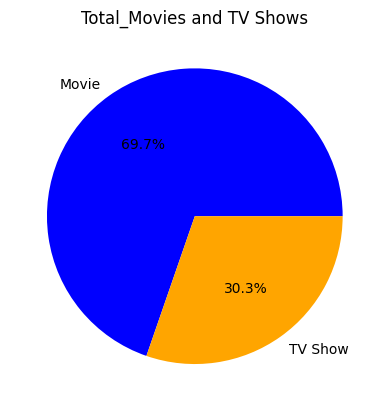

In [91]:
types = df.type.value_counts()
plt.pie(types,  labels=types.index, autopct='%1.1f%%' , colors = ['blue' , 'orange'])
plt.title('Total_Movies and TV Shows')
plt.show()

It is observed that , around 70% content is Movies and around 30% content is TV shows.

* 4.2 Distribution of 'date_added' column

 How has the number of movies/TV shows added on Netflix per year changed over the time?

In [92]:
d = df.groupby(['year_added' ,'type' ])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)

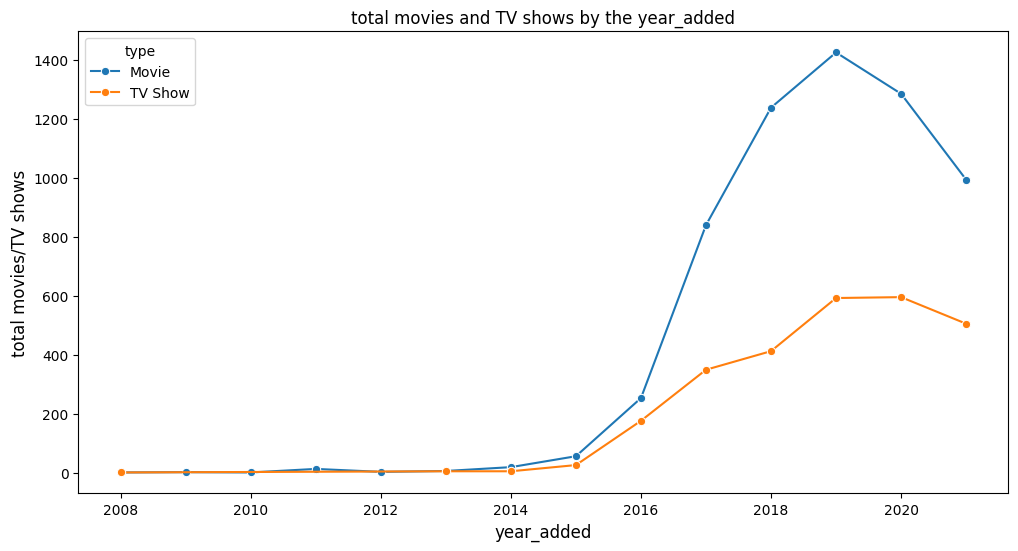

In [93]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'year_added' , y = 'total movies/TV shows' , hue = 'type', marker = 'o'  , ms = 6)
plt.xlabel('year_added' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the year_added' , fontsize = 12)
plt.show()

**Observations :**
* The amount of content added to Netflix surged significantly after 2015.
* 2019 saw the highest number of movies and TV shows being added.
* However, in 2020 and 2021, there was a noticeable drop in content added to Netflix, likely due to the pandemic.
* Despite this, the decline in TV shows was not as severe as that of movies. In recent years, there has been a greater focus on TV shows than on movies.

* 4.3 Distribution of 'Release_year' column

How has the number of movies released per year changed over the last 20-30 years?

In [94]:
d = df.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)
d

,type,release_year,total movies/TV shows
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,379
116,TV Show,2019,397
117,TV Show,2020,436


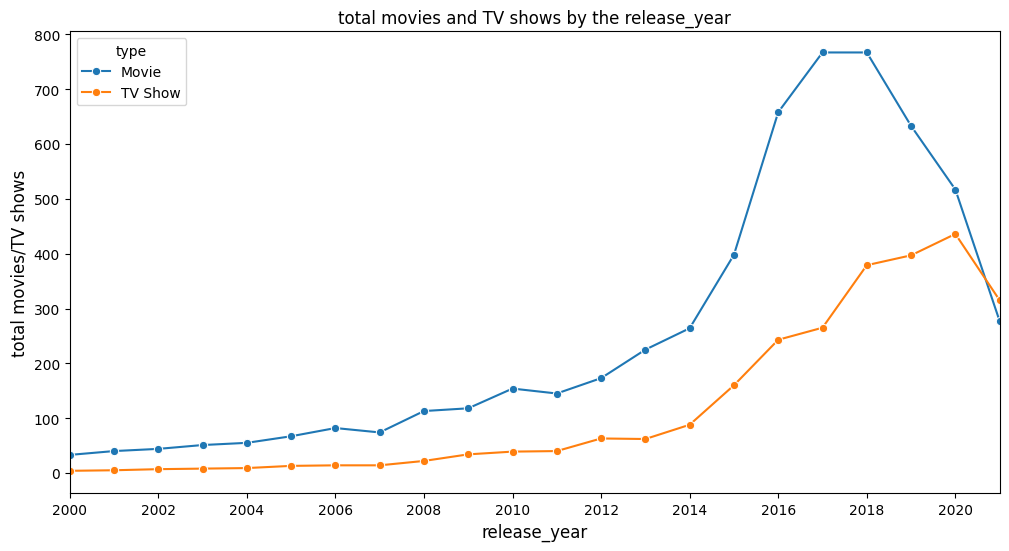

In [95]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'release_year' , y = 'total movies/TV shows' , hue = 'type' , marker = 'o'  , ms = 6 )
plt.xlabel('release_year' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the release_year' , fontsize = 12)
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(2000 , 2021 , 2))
plt.show()

**Observations :**
   * 2018 marks the highest number of movie and TV show releases.
   * Since 2018, A drop in movies is seen and rise in TV shows is observed clearly, and TV shows surpasses the movies count in mid 2020.
   * In recent years TV shows are focussed more than Movies.
   * The yearly number of releases has surged drastically from 2015.



* 4.4 Total movies/TV shows by each director

In [96]:
# total Movies directed by top 10 directors
top_10_dir = dir_tb.director.value_counts().head(10).index
df_new = dir_tb.loc[dir_tb['director'].isin(top_10_dir)]

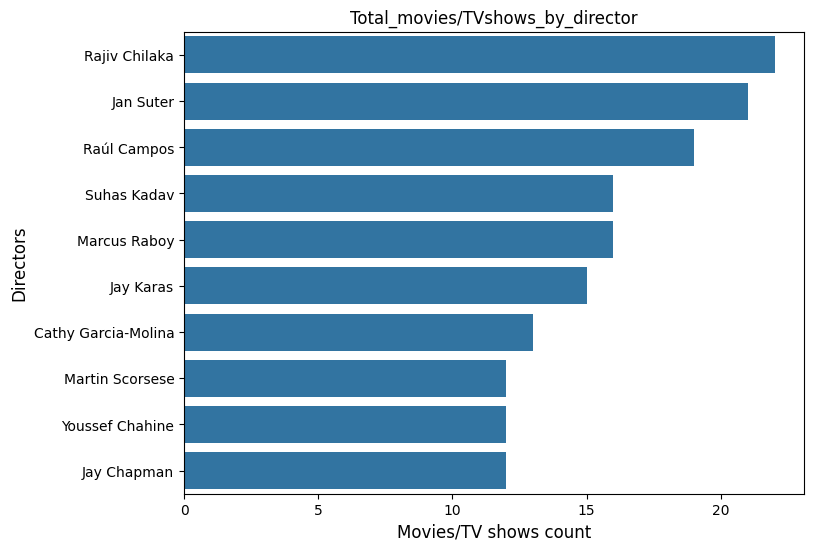

In [97]:
plt.figure(figsize= (8 , 6))
sns.countplot(data = df_new , y = 'director' , order = top_10_dir , orient = 'v')
plt.xlabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Total_movies/TVshows_by_director')
plt.show()

**Observation :**
   * The top 3 directors on Netflix in terms of count of movies directed by them are - Rajiv Chilaka, Jan Suter, Raúl Campos

* 4.4 Checking Outliers for number of movies directed by each director

In [98]:
x = dir_tb.director.value_counts()
x

,count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
...,...
Phillip Youmans,1
Pawan Kumar,1
Xavier Durringer,1


In [99]:
def calculate_outliers(data):
    # Calculate the first quartile (Q1)
    q1 = np.percentile(data, 25)

    # Calculate the third quartile (Q3)
    q3 = np.percentile(data, 75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Determine the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers in the dataset
    outliers = [value for value in data if value < lower_bound or value > upper_bound]

    return outliers


def calculate_max_occurred_value(data):
    # Calculate the unique values and their counts in the dataset
    unique_values, value_counts = np.unique(data, return_counts=True)

    # Find the index of the maximum count
    max_count_index = np.argmax(value_counts)

    # Retrieve the corresponding unique value with the maximum count
    max_occurred_value = unique_values[max_count_index]

    return max_occurred_value

In [100]:
outliers = calculate_outliers(x)  # Implement your outlier calculation method
max_occurred_value = calculate_max_occurred_value(x)  # Implement your method to find the maximum-occurred value
set(outliers)

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 21, 22}

In [101]:
max_occurred_value

np.int64(1)

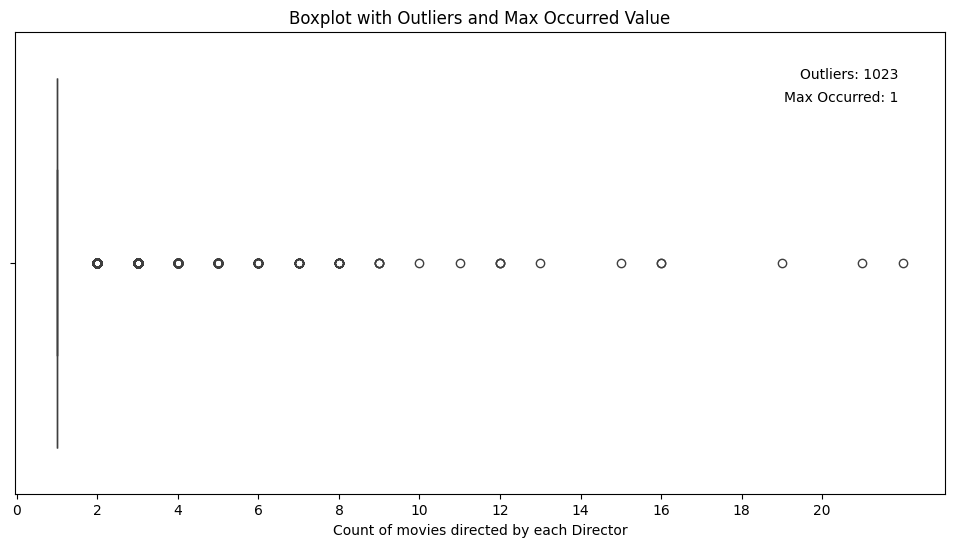

In [102]:
plt.figure(figsize = (12,6))
sns.boxplot(data=x, showfliers=True, whis=1.5 , orient = 'h')

# Calculate the outliers and maximum-occurred value
outliers = calculate_outliers(x)  # Implement your outlier calculation method
max_occurred_value = calculate_max_occurred_value(x)  # Implement your method to find the maximum-occurred value

# Annotate the plot
plt.text(0.95, 0.9, f"Outliers: {len(outliers)}", transform=plt.gca().transAxes, ha='right')
plt.text(0.95, 0.85, f"Max Occurred: {max_occurred_value}", transform=plt.gca().transAxes, ha='right')


plt.xlabel("Count of movies directed by each Director")
plt.xticks(np.arange(0,22,2))
plt.title("Boxplot with Outliers and Max Occurred Value")

# Show the plot
plt.show()

It is Observed that maximum occured value is 1, which means maximum directors on the Netflix have directed 1 movie/Tv show. There are few directors who have directed more than 1 movies/tv shows and they are outliers.

* 4.5 Total movies/TV shows by each country

In [103]:
# Lets check for top 10 countries
top_10_country = country_tb.country.value_counts().head(10).index
df_new = country_tb.loc[country_tb['country'].isin(top_10_country)]

In [104]:
x = df_new.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2752,932
India,962,84
United Kingdom,534,271
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,198
Mexico,111,58


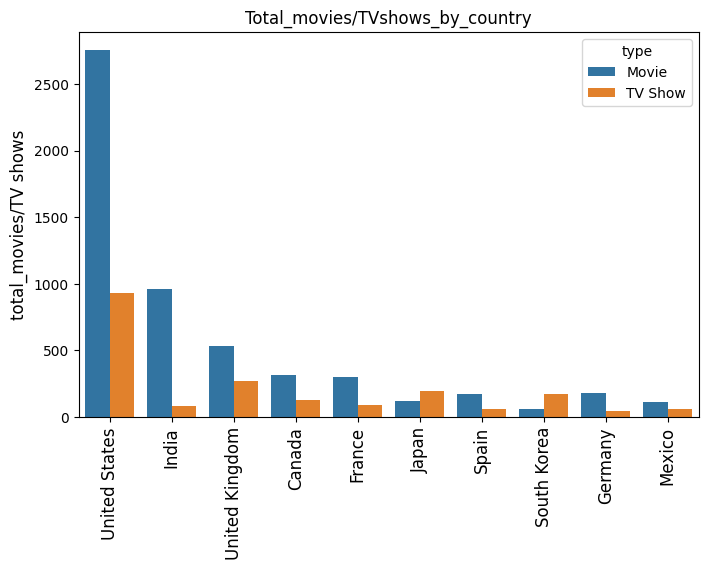

In [105]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

In [106]:
top_10_country = country_tb.country.value_counts().head(10).index
country_tb['cat'] = country_tb['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

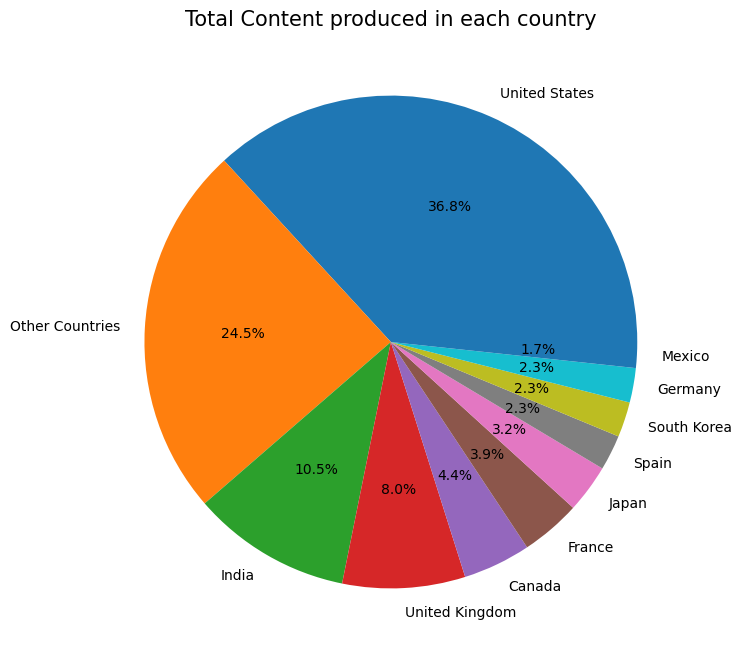

In [107]:
x = country_tb.cat.value_counts()

plt.figure(figsize = (8,8))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

**Observations :**

    * United States is the HIGHEST contributor country on Netflix, followed by India and United Kingdom.
    
    * Maximum content of Netflix which is around 75% , is coming from these top 10 countries.  Rest of the world only contributes 25% of the content.

* 4.6 Total content distribution by release year of the content

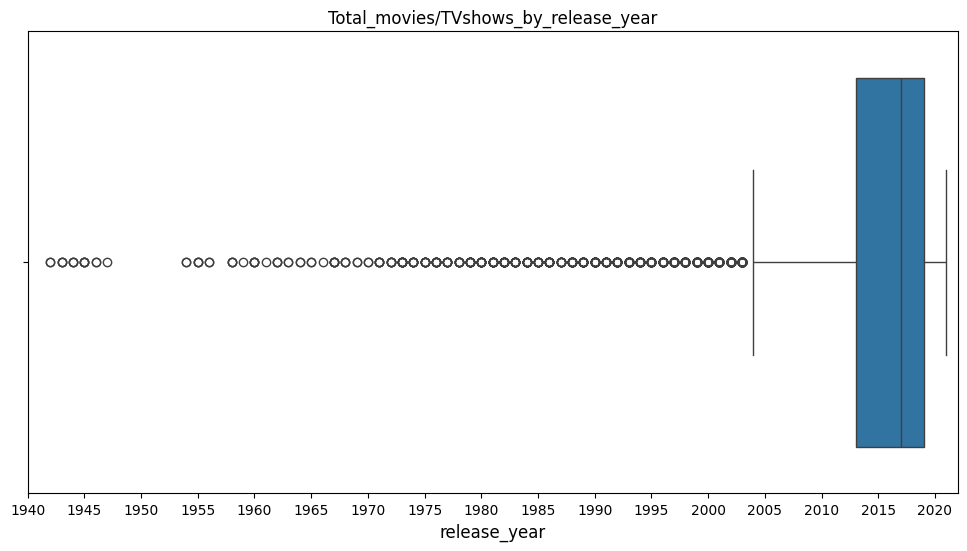

In [108]:
plt.figure(figsize= (12,6))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('release_year' , fontsize = 12)
plt.title('Total_movies/TVshows_by_release_year')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.xlim((1940 , 2022))
plt.show()

* Netflix has most of its content released in the year range 2000-2021
* It seems that the content older than year 2000 is almost missing from the Netflix.

* 4.7 Total movies/TV shows distribution by rating of the content

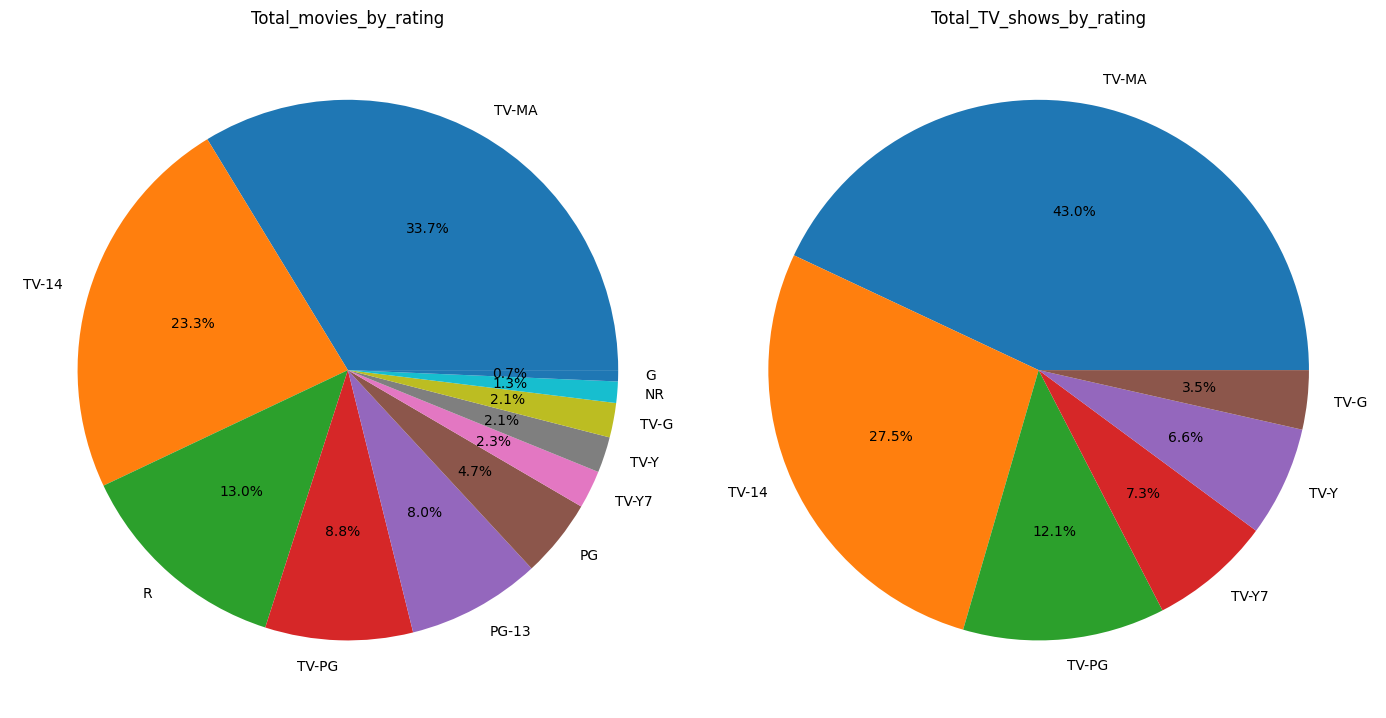

In [109]:
m = movies.loc[~movies.rating.isin(['Not Available' , 'NC-17' , 'TV-Y7-FV'])]
m = m.rating.value_counts()
t = tv_shows.loc[~tv_shows.rating.isin(['Not Available' , 'R' , 'NR', 'TV-Y7-FV'])]
t = t.rating.value_counts()


fig, ax = plt.subplots(1,2, figsize=(14,8))
ax[0].pie(m , labels = m.index, autopct='%1.1f%%')
ax[0].set_title('Total_movies_by_rating')

ax[1].pie(t , labels = t.index, autopct='%1.1f%%')
ax[1].set_title('Total_TV_shows_by_rating')

plt.tight_layout()
plt.show()

Highest number of movies and TV shows are rated TV-MA (for mature audiences), followed by TV-14 & R/TV-PG

* 4.8 Total movies/TV shows distributionby duration of the content

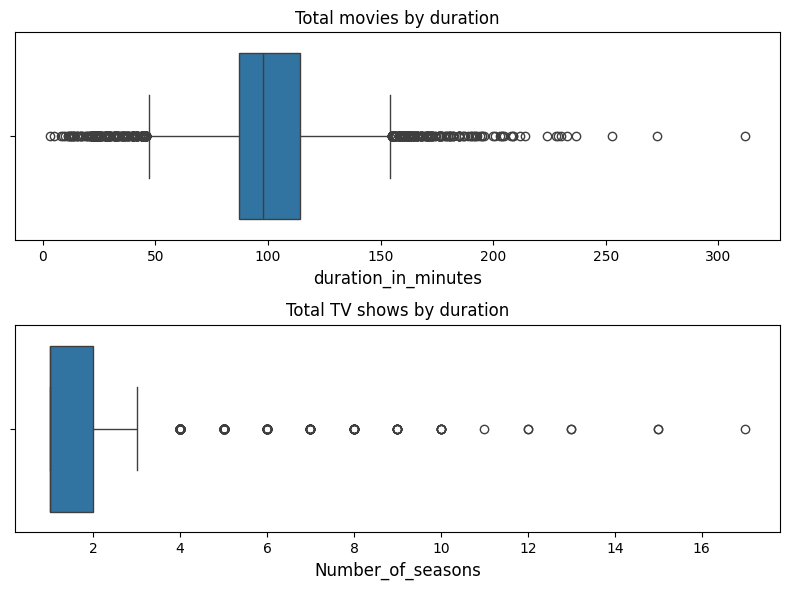

In [110]:
fig, ax = plt.subplots(2,1, figsize=(8,6))

sns.boxplot (data = movies , x = 'duration_in_minutes' ,ax =ax[0])
ax[0].set_xlabel('duration_in_minutes' ,  fontsize = 12)
ax[0].set_title('Total movies by duration')

sns.boxplot (data = tv_shows , x = 'duration_in_seasons' , ax = ax[1])
ax[1].set_xlabel('Number_of_seasons' ,  fontsize = 12)
ax[1].set_title('Total TV shows by duration')

plt.tight_layout()
plt.show()

* Movie Duration: 50 mins - 150 mins is the range excluding potential outliers (values lying outside the whiskers of boxplot)
* TV Show Duration: 1-3 seasons is the range for TV shows excluding potential outliers

* 4.9 Total movies/TV shows in each Genre

In [111]:
# Lets check the count for top 10 genres in Movies and TV_shows

top_10_movie_genres = genre_tb[genre_tb['type'] == 'Movie'].listed_in.value_counts().head(10).index
df_movie = genre_tb.loc[genre_tb['listed_in'].isin(top_10_movie_genres)]

top_10_TV_genres = genre_tb[genre_tb['type'] == 'TV Show'].listed_in.value_counts().head(10).index
df_tv = genre_tb.loc[genre_tb['listed_in'].isin(top_10_TV_genres)]

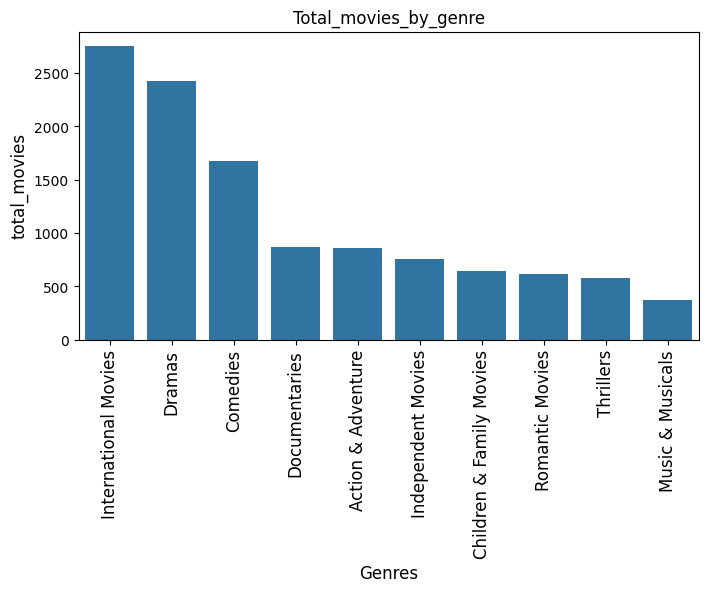

In [112]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_movie , x = 'listed_in' , order = top_10_movie_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

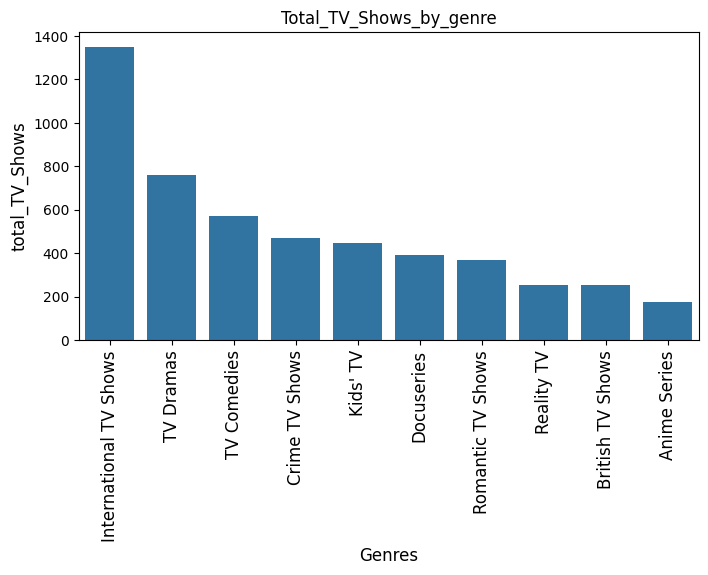

In [113]:
plt.figure(figsize= (8,4))
sns.countplot(data = df_tv , x = 'listed_in' , order = top_10_TV_genres)
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_TV_Shows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_TV_Shows_by_genre')
plt.show()

* International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

# 5. Bivariate Analysis

* 5.1  Lets check popular genres in top 20 countries

In [114]:
top_20_country = country_tb.country.value_counts().head(20).index
top_20_country = country_tb.loc[country_tb['country'].isin(top_20_country)]

In [115]:
x = top_20_country.merge(genre_tb , on = 'show_id').drop_duplicates()
country_genre = x.groupby([ 'country' , 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in' , columns = 'country' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Genres')

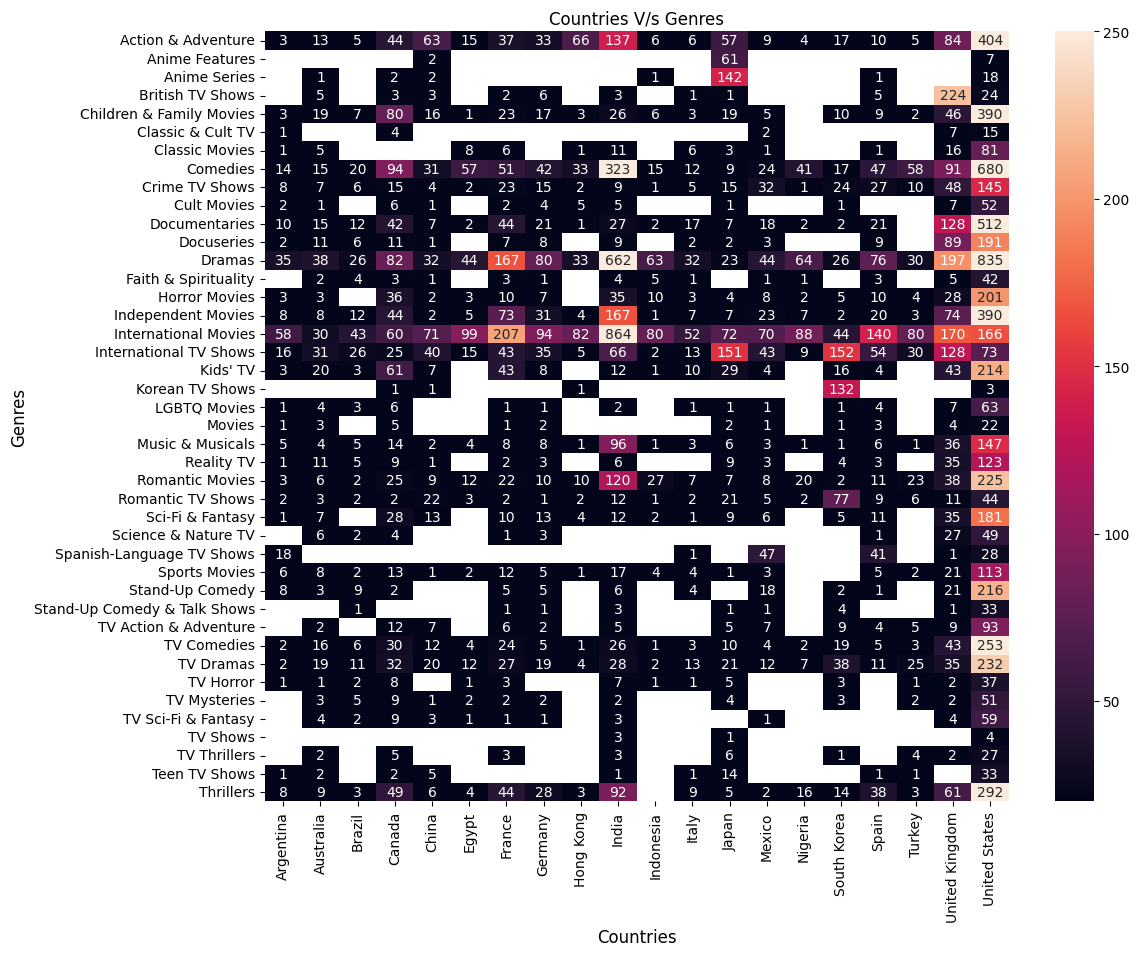

In [116]:
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre , annot = True , fmt=".0f" , vmin = 20 , vmax = 250 )
plt.xlabel('Countries' , fontsize = 12)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 12)

* Popular genres across countries: Action & Adventure, Children & Family Movies, Comedies, Dramas, International Movies & TV Shows, TV Dramas, Thrillers

* Country-specific genres: Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argentina, Mexico and Spain)

* United States and UK have a good mix of almost all genres.

* Maximum International movies are produced in India.

5.2 Country-wise Rating of Content

In [117]:
x = top_20_country.merge(df , on = 'show_id').groupby(['country_x' , 'rating'])['show_id'].count().reset_index()

In [118]:
country_rating = x.pivot(index = ['country_x'] , columns = 'rating' , values = 'show_id')

Text(0.5, 1.0, 'Countries V/s Rating')

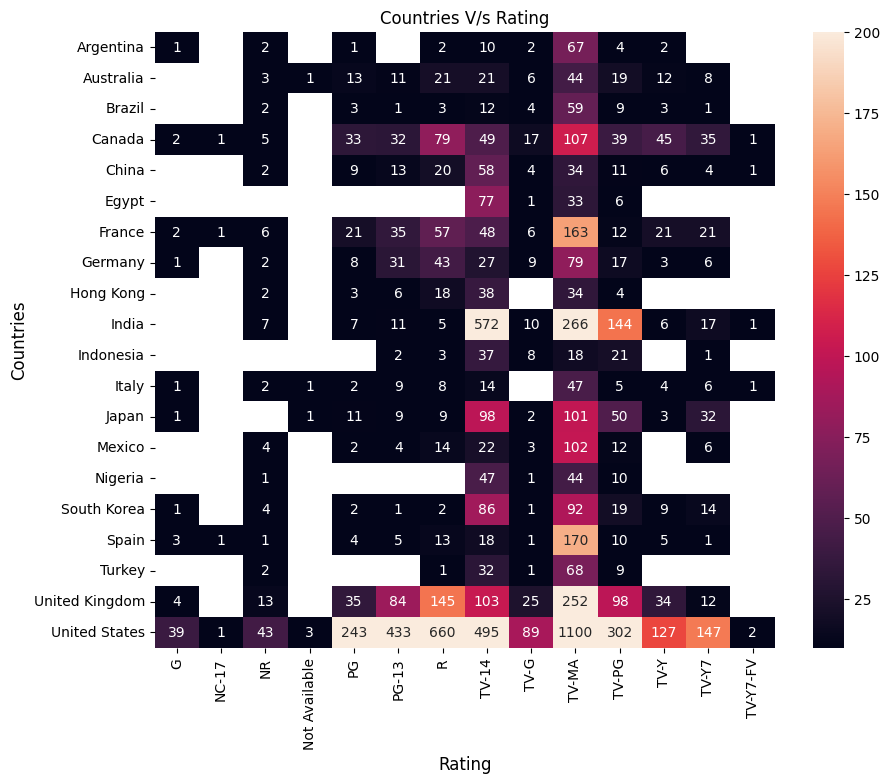

In [119]:
plt.figure(figsize = (10,8))
sns.heatmap(data = country_rating , annot = True , fmt=".0f"  , vmin = 10 , vmax=200)
plt.ylabel('Countries' , fontsize = 12)
plt.xlabel('Rating' , fontsize = 12)
plt.title('Countries V/s Rating' , fontsize = 12)



*   Netflix offers a significant amount of adult content (rated TV-MA & TV-14) across all countries.
*   In India, there is also a substantial number of titles rated TV-PG, in addition to TV-MA and TV-14.
* The US, Canada, UK, France, and Japan are the only countries that offer content for young audiences (rated TV-Y & TV-Y7).
* Content suitable for a general audience (rated TV-G & G) is rare across all countries, with the exception of the US.



5.3 The Top actors by country

In [120]:
x = cast_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'cast'])['show_id'].count().reset_index()
x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

,country,cast,show_id
49405,United States,Tara Strong,22
48330,United States,Samuel L. Jackson,22
40463,United States,Fred Tatasciore,21
35733,United States,Adam Sandler,20
46429,United States,Nicolas Cage,19


In [121]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

In [122]:
for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)


In [123]:
# top 5 actors in top countries and their movies/tv shows count
top_5_actors


,country,cast,show_id
0,United States,Tara Strong,22
1,United States,Samuel L. Jackson,22
2,United States,Fred Tatasciore,21
3,United States,Adam Sandler,20
4,United States,Nicolas Cage,19
5,India,Anupam Kher,40
6,India,Shah Rukh Khan,34
7,India,Naseeruddin Shah,31
8,India,Akshay Kumar,29
9,India,Om Puri,29


<Axes: xlabel='show_id', ylabel='cast'>

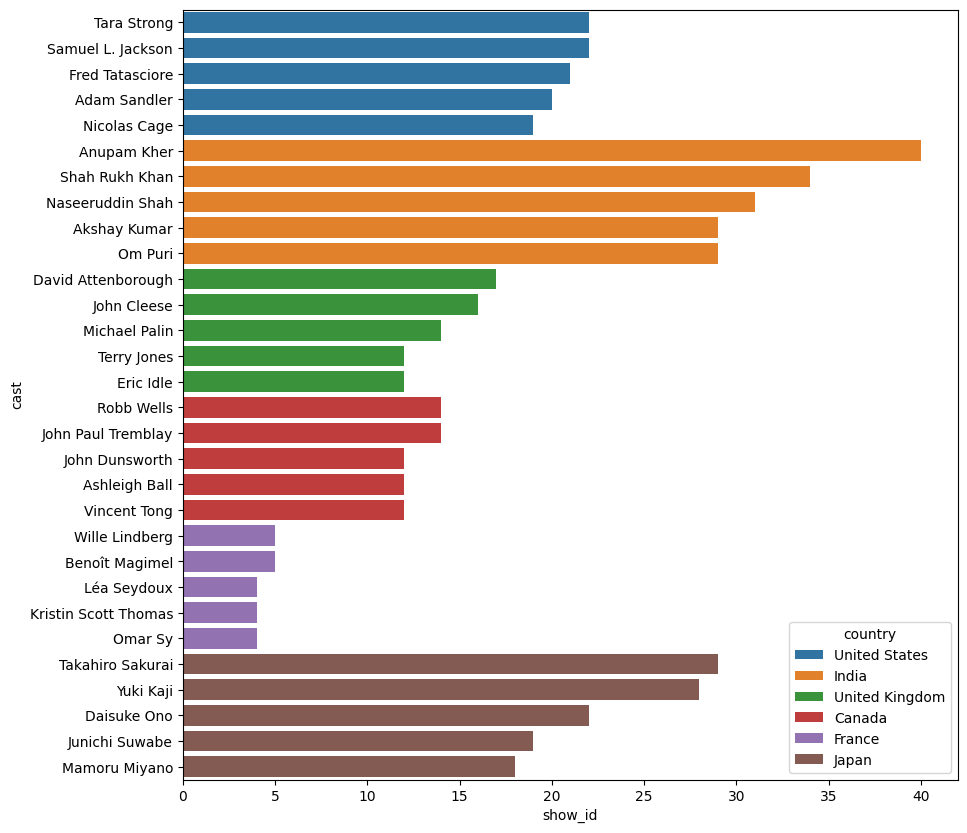

In [124]:
plt.figure(figsize = (10,10))
sns.barplot(data = top_5_actors , y = 'cast' , x = 'show_id' , hue = 'country')

*  5.4 Top 5 directors by Genre

In [125]:
genre_list = [ 'Children & Family Movies', 'Comedies','Dramas', 'International Movies', 'Documentaries' ,
              'International TV Shows', 'Sci-Fi & Fantasy', 'Thrillers', 'Horror Movies']

x = dir_tb.merge(genre_tb , on = 'show_id').groupby([ 'listed_in' , 'director',])['show_id'].count().reset_index()

top_5_dir = x.loc[x['listed_in'] == 'Action & Adventure'].sort_values('show_id' , ascending = False).head()

for i in genre_list:
    new = x.loc[x['listed_in'] == i].sort_values('show_id' , ascending = False).head()
    top_5_dir = pd.concat([top_5_dir , new])

top_5_dir

,listed_in,director,show_id
147,Action & Adventure,Don Michael Paul,9
215,Action & Adventure,Hidenori Inoue,7
550,Action & Adventure,S.S. Rajamouli,7
651,Action & Adventure,Toshiya Shinohara,7
398,Action & Adventure,McG,5
1215,Children & Family Movies,Rajiv Chilaka,22
1303,Children & Family Movies,Suhas Kadav,16
1211,Children & Family Movies,Prakash Satam,7
1241,Children & Family Movies,Robert Rodriguez,7
1295,Children & Family Movies,Steven Spielberg,6


* 5.5  Top 5 genres in each country

In [126]:
x = genre_tb.merge(country_tb , on = 'show_id').drop_duplicates()
x = x.groupby(['country' , 'listed_in'])['show_id'].count().reset_index()
x.loc[x['country'] == 'United States'].sort_values('show_id' , ascending = False).head(5)

country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_genre = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)

In [127]:
top_5_genre

,country,listed_in,show_id
0,United States,Dramas,835
1,United States,Comedies,680
2,United States,Documentaries,512
3,United States,Action & Adventure,404
4,United States,Children & Family Movies,390
5,India,International Movies,864
6,India,Dramas,662
7,India,Comedies,323
8,India,Independent Movies,167
9,India,Action & Adventure,137


* 5.6 Variation in duration of movies by Release year


(0.0, 200.0)

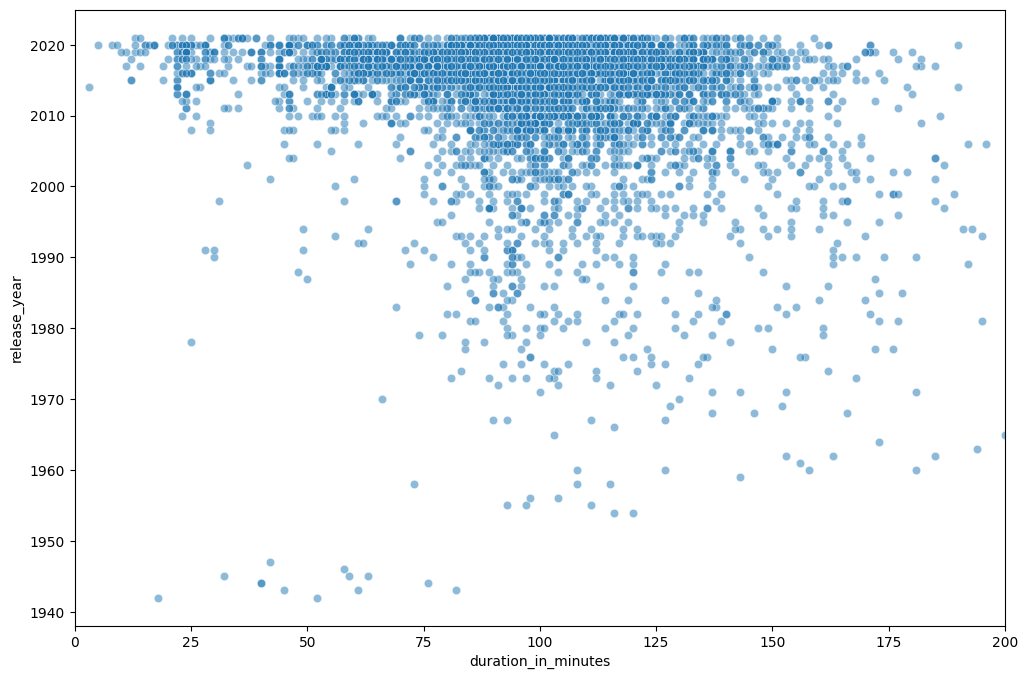

In [129]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = movies['duration_in_minutes'],y = movies['release_year'],  alpha=0.5)
plt.xlim((0,200))

**Observations:**

* The movies shorter than 150 minutes duration have increased drastically after 2000 while movies longer than 150 minutes are not much popular.
* There is a huge surge in the number of shorter duration movies (less than 75 mins) post 2010. Overall, Short movies have been popular in last 10 years.

* 5.7  What is the best time of the year when maximum content get added on the Netflix?

In [130]:
month_year = df.groupby(['year_added' , 'month_added'])['show_id'].count().reset_index()

Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

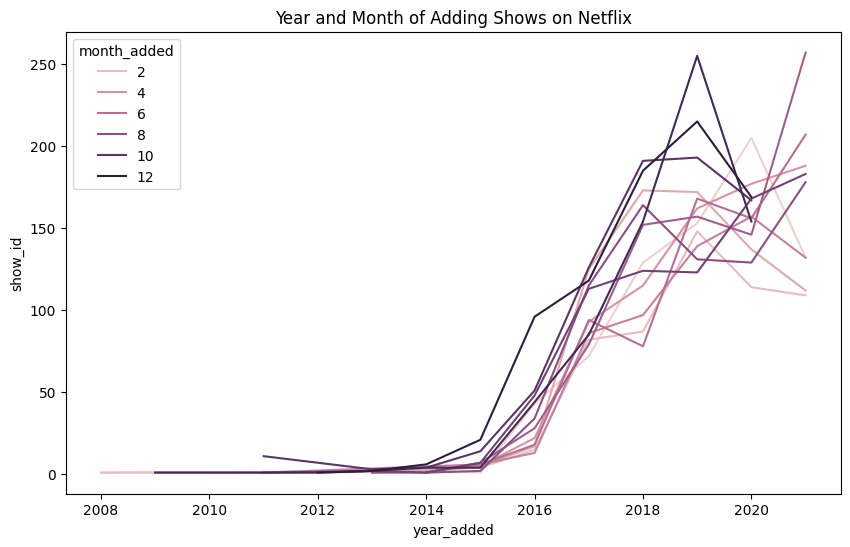

In [131]:
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'year_added', y = 'show_id', hue='month_added')
plt.title('Year and Month of Adding Shows on Netflix')

* The number of shows getting added is increasing with each year until 2020.
* Also, months in the last quarter of the year (Oct-Dec) have more shows being added than the other months of the year. This could be because US has its festive season in Dec and India also has Diwali in Oct-Nov.

**5.8 Which countries are adding more number of content over the time?**

In [132]:
country_list = country_tb.country.value_counts().head(12).index
top_12_country = country_tb.loc[country_tb['country'].isin(country_list)]
country_year = top_12_country.merge(df , on = 'show_id')[['show_id','country_x' ,'type_x' , 'year_added' ]]
country_year.columns = ['show_id', 'country', 'type', 'year_added']


In [133]:
country_year = country_year.groupby(['country' , 'year_added'])['show_id'].count().reset_index()

<Axes: xlabel='year_added', ylabel='show_id'>

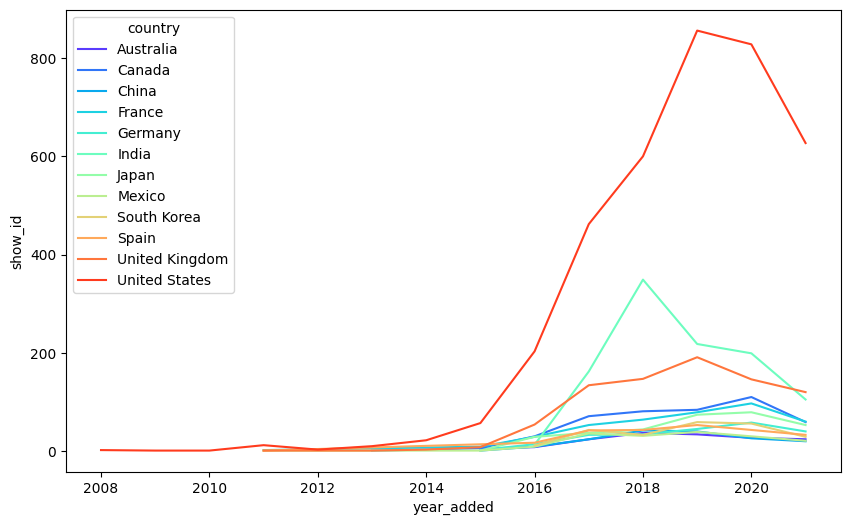

In [134]:
plt.figure(figsize = (10,6))
sns.lineplot(data = country_year , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

**Observation :**

* United Stated have always added highset number of movies/TV shows over the time.
* Since 2016, India has seen spike in popularity of content and added more number of content, followed by United Kingdom at 3rd position.

In [138]:
country_list = country_tb.country.value_counts().head(12).index
top_12_country = country_tb.loc[country_tb['country'].isin(country_list)]
country_year = top_12_country.merge(df , on = 'show_id')[['show_id','country_x' ,'type_x' , 'year_added' ]]
country_year.columns = ['show_id', 'country', 'type', 'year_added']

country_year_grouped = country_year.groupby(['country' , 'year_added'])['show_id'].count().reset_index()

movie_type = country_year.loc[country_year.type == 'Movie'].groupby(['country' , 'year_added'])['show_id'].count().reset_index()
tv_type = country_year.loc[country_year.type == 'TV Show'].groupby(['country' , 'year_added'])['show_id'].count().reset_index()



<Axes: xlabel='year_added', ylabel='show_id'>

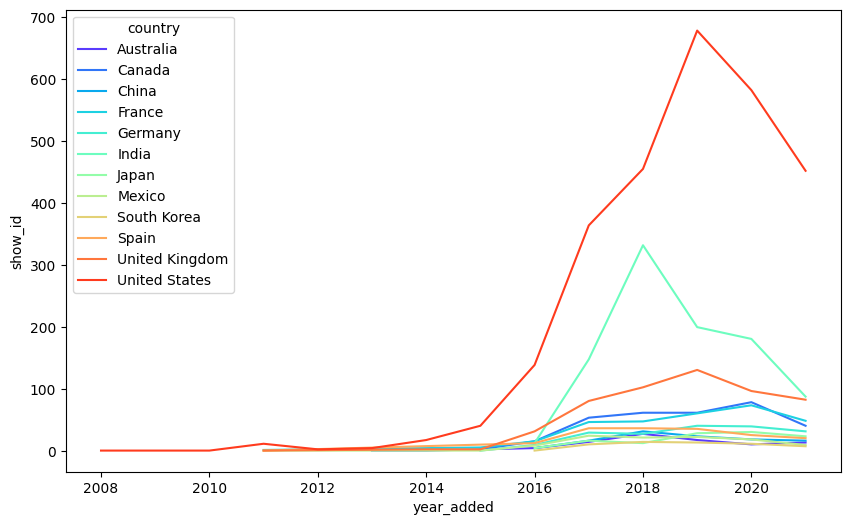

In [137]:
plt.figure(figsize = (10,6))
sns.lineplot(data = movie_type , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

<Axes: xlabel='year_added', ylabel='show_id'>

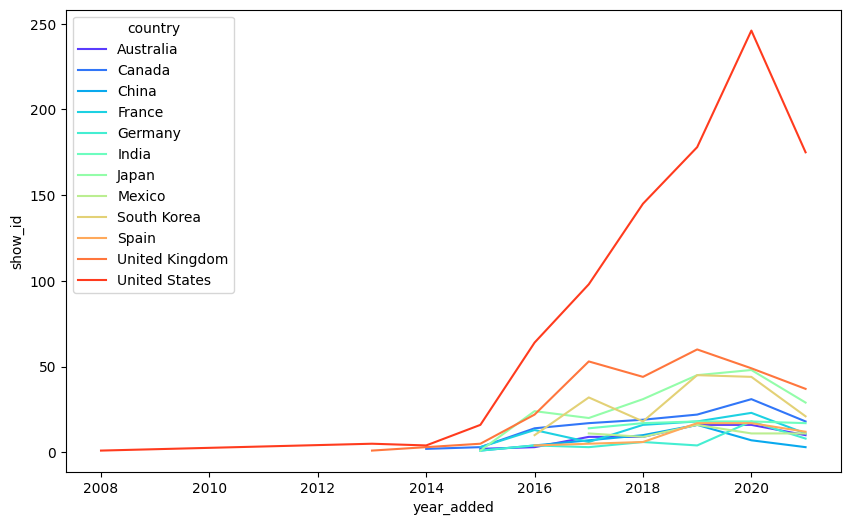

In [139]:
plt.figure(figsize = (10,6))
sns.lineplot(data = tv_type , x = 'year_added' , y = 'show_id' , hue = 'country' , palette ='rainbow' )

**Observation:**
* It is observed that United States tops in both movies and TV Shows.
* India is at 2nd positon in movies but In TV shows United Kingdom is at 2nd position, followed by India ,South Korea , Australia.
* It shows that in countries like United Kingdom , South Korea and Australia, TV Shows popularity is rising more than movies


# Insights based on Non-Graphical and Visual Analysis

* Around 70% content on Netflix is Movies and around 30% content is TV shows.
* The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.
* Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.
* Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly.  Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.
* Netflix has movies from variety of directors. Around 4993 directors have their movies or tv shows on Netflix.
* Netflix has movies from total 122 countries, United States being the highset contributor with almost 37% of all the content.
* The release year for shows is concentrated in the range 2005-2021.
* 50 mins - 150 mins is the range of movie durations, excluding potential outliers.
* 1-3 seasons is the range for TV shows seasons, excluding potential outliers.
* various ratings of content is avaialble on netfilx, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).
* Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US.
* International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.
* Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.
* Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies.
*  Shorter duration movies have been popular in last 10 years.




# Business Insights

**Business Insights on Netflix's Content and Audience Trends**

* Netflix's content library predominantly features releases post-2000, with older content being relatively scarce. This presents an opportunity to target senior citizens, a demographic currently underserved by Netflix's available content.

* The majority of Netflix's programming (over 80%) falls under mature or adult ratings:

    * TV-MA – Content intended for viewers aged 17 and above
    * TV-14 – Content suitable for viewers aged 14 and above
    * TV-PG – Parental guidance suggested (similar to PG-13 or PG)
    * R – Restricted content, typically not suitable for viewers under 17

* This suggests that Netflix primarily caters to mature and adult audiences, with the remaining 20% focused on children's programming for those under 13. As such, Netflix is serving two main audience segments: mature/adult viewers and children with parental guidance.

* The platform's most popular genres include International Movies and TV Shows, Dramas, Comedies, Action & Adventure, Children & Family Movies, and Thrillers.

 * Notably, approximately 75% of Netflix's content originates from the top 10 countries, leaving only 25% from the rest of the world. Expanding content from more countries could be a strategic focus for global growth.

* There is also a growing preference for shorter-duration content (between 75 to 150 minutes), as well as series with 1 to 3 seasons. This trend could guide Netflix's future content production strategy to align with evolving viewer preferences.

Finally, a noticeable decline in content availability occurred in 2020 and 2021 across all countries and content types, likely due to the impact of the COVID-19 pandemic on production schedules.

# Recommendations

**Country-Specific Content Strategy for Netflix**

* Currently, Netflix's content offerings focus on a limited set of genres, particularly in countries outside the U.S. While the available genres cater well to audiences in the U.S. and a few other countries, many other regions could benefit from a broader range of content tailored to local preferences.
* For instance, Indian mythological content is highly popular, and expanding region-specific genres could not only appeal to local audiences but also gain international interest, similar to the global popularity of Japanese anime.

**Country-Specific Demographic Insights:**

To better serve various markets, Netflix should target content specifically based on the demographics of each country. Producing content tailored to the age and cultural preferences of a country's population can help Netflix resonate with a wider audience. For example:

* India: With its large and diverse population, Netflix’s content offerings are currently concentrated around three key ratings—TV-MA, TV-14, and TV-PG. However, this setup does not fully cater to younger audiences (under 14) or the adult audience (35+ years). There is an opportunity to diversify content for these age groups and explore more family-friendly or age-specific content, which could be particularly beneficial for India’s broad demographic.

* Japan: In Japan, where a significant portion of the population is over 60 years old, Netflix content mainly consists of TV-MA, TV-14, and TV-PG ratings. However, there is a gap in content tailored for senior citizens. By expanding offerings for older audiences, Netflix could tap into this underrepresented demographic, creating more opportunities for engagement among Japan’s aging population.

In summary, while Netflix has a strong presence serving mature audiences and children with parental guidance, there is significant potential to cater to other groups such as families, senior citizens, and various age groups of children. By developing content specific to each country’s demographic, Netflix can better cater to regional tastes, attract new subscribers, and expand its global reach.

